In [1]:
# Imports
import pickle
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
from copy import deepcopy
import plotly.graph_objects as go
from scipy.optimize import curve_fit
from dataclasses import make_dataclass

import sys
module_path = 'code' 
if module_path not in sys.path:
    sys.path.append(module_path)

# Markus's code
from MM_Plot_Utils import plot, hist
from MM_Maze_Utils import *
from MM_Traj_Utils import *

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from matplotlib.collections import LineCollection

from utils import nodes2cell

In [3]:
# Some lists of nicknames for mice
UnrewNames=['B5','B6','B7','D3','D4','D5','D6','D7','D8','D9']
RewNames=['B1','B2','B3','B4','C1','C3','C6','C7','C8','C9']
AllNames=RewNames+UnrewNames
UnrewNamesSub=['B5','B6','B7','D3','D4','D5','D7','D8','D9'] # excluding D6 which barely entered the maze

In [4]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams["font.size"] = 18

In [5]:
figpath = '/Users/us3519/mouse-maze/figs/paper figs/figure_data'

In [6]:
def plt_trajectory(state_hist_all, episode_idx, save_file_name=None, title=None, display=True, figsize=(9,9), entry_exit_colorbar=False):
    '''
    Plots specified simulated trajectories on the maze layout.
    
    state_hist_all: list of trajectories simulated by a model.
        Eg. [[0,1,3..], [28, 57, 116, ..], [0, 2, ..]]
    episode_idx: 'all', to plot all trajectories in state_hist_all
             int, to plot a specific bout/episode with index episode_idx
    
    Plots One maze figure with plotted trajectories and a color bar indicating nodes from entry to exit
    Returns: None
    '''
    state_hist_cell, state_hist_xy = nodes2cell(state_hist_all)
    
    ma=NewMaze(6) # Draw the maze outline    
    fig,ax=plt.subplots(figsize=figsize)
    plot(ma.wa[:,0],ma.wa[:,1],fmts=['k-'],equal=True,linewidth=2,yflip=True,
              xhide=True,yhide=True,axes=ax, title=None, alpha=1)

    re=[[-0.5,0.5,1,1],[-0.5,4.5,1,1],[-0.5,8.5,1,1],[-0.5,12.5,1,1],
       [2.5,13.5,1,1],[6.5,13.5,1,1],[10.5,13.5,1,1],
       [13.5,12.5,1,1],[13.5,8.5,1,1],[13.5,4.5,1,1],[13.5,0.5,1,1],
       [10.5,-0.5,1,1],[6.5,-0.5,1,1],[2.5,-0.5,1,1],
       [6.5,1.5,1,1],[6.5,11.5,1,1],[10.5,5.5,1,1],[10.5,7.5,1,1],
       [5.5,4.5,1,1],[5.5,8.5,1,1],[7.5,4.5,1,1],[7.5,8.5,1,1],[2.5,5.5,1,1],[2.5,7.5,1,1],
       [-0.5,2.5,3,1],[-0.5,10.5,3,1],[11.5,10.5,3,1],[11.5,2.5,3,1],[5.5,0.5,3,1],[5.5,12.5,3,1],
       [7.5,6.5,7,1]]  # coordinates of gray rectangles, the inaccessible regions of the maze

    for r in re:
        rect=patches.Rectangle((r[0],r[1]),r[2],r[3],linewidth=1,edgecolor='lightgray',facecolor='lightgray', alpha=0.6)
        ax.add_patch(rect)
    ax.text(-1.2, 7.5, 'HOME', rotation='vertical')
    plt.axis('off')

    for id, epi in enumerate(state_hist_xy):
        x = epi[:,0]
        y = epi[:,1]
        t = np.linspace(0,1, x.shape[0]) # your "time" variable

        # set up a list of (x,y) points
        points = np.array([x,y]).transpose().reshape(-1,1,2)

        # set up a list of segments
        segs = np.concatenate([points[:-1],points[1:]],axis=1)

        # make the collection of segments
        lc = LineCollection(segs, cmap=plt.get_cmap('viridis'),linewidths=4) # jet, viridis hot
        lc.set_array(t) # color the segments by our parameter

#         # put a blue star in the beginning and a yellow star in the end of each trajectory
#         plt.plot(points[ 0, 0, 0], points[ 0, 0, 1], "*", markersize=10, color="blue")
#         plt.plot(points[-1, 0, 0], points[-1, 0, 1], "*", markersize=10, color="yellow")

        # plot the collection
        lines=ax.add_collection(lc); # add the collection to the plot

    # entry-exit colorbar
    if entry_exit_colorbar:
        cax=fig.add_axes([1.05, 0.05, 0.05, 0.9])
        cbar=fig.colorbar(lines,cax=cax)
        cbar.set_ticks([0,1])
        cbar.set_ticklabels(['Entry','Exit'])
        cbar.ax.tick_params(labelsize=30)

    ax.set_title(title, y=0.99, fontsize=50)
    plt.tight_layout()
    if save_file_name:
        plt.savefig(save_file_name, dpi=300, bbox_inches='tight', transparent=True)
    if display:
        plt.show()
    return

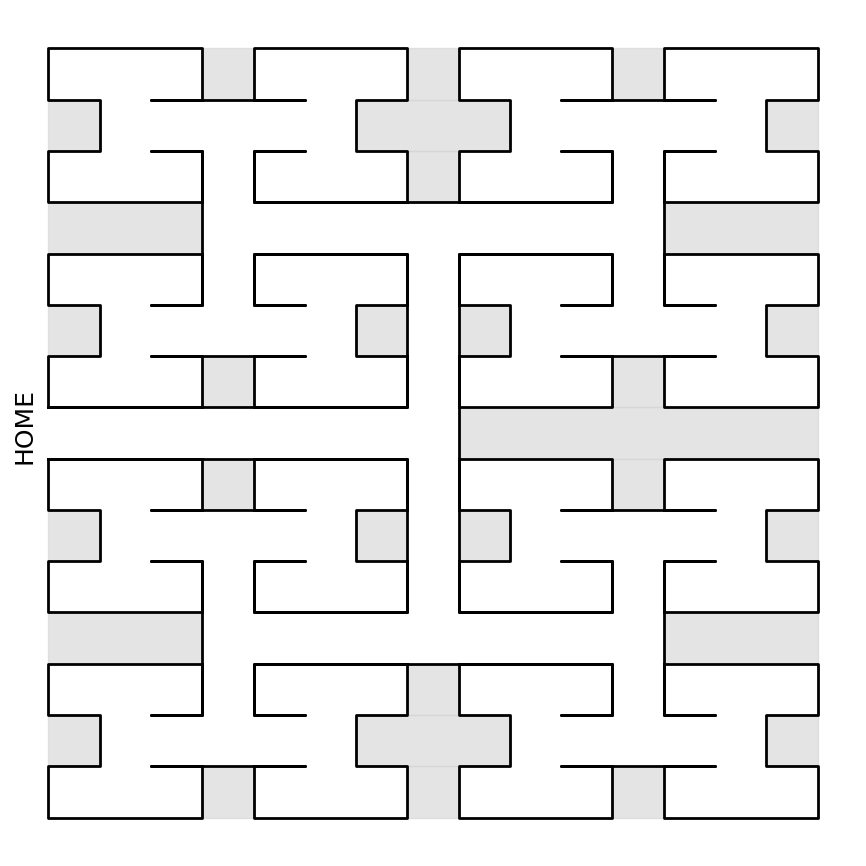

In [12]:
plt_trajectory([], 'all', save_file_name=f'{figpath}/empty_maze.pdf')

130


/var/folders/yx/80nc9b6n4pg69y4hhtmkpw100000gp/T/ipykernel_69760/2401505023.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


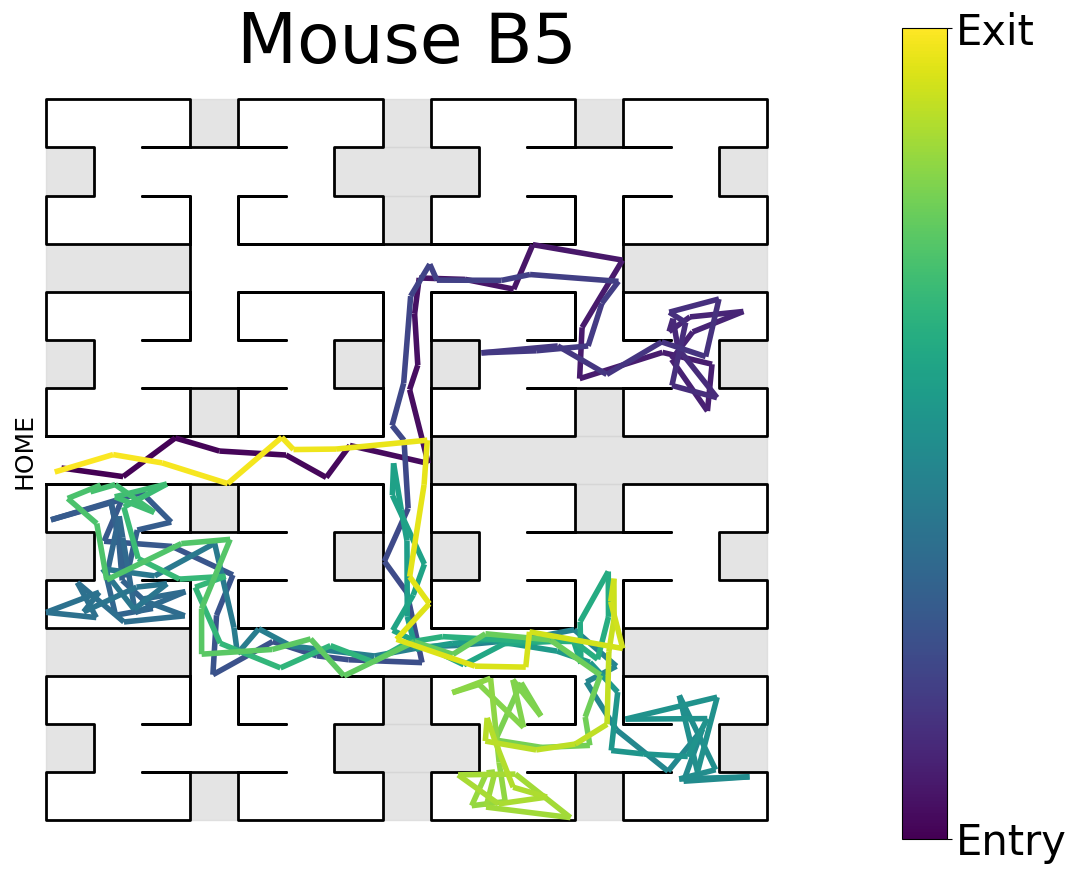

In [124]:
mouse='B5'
tf = LoadTrajFromPath(f'../outdata/{mouse}-tf')
i=81
traj = tf.no[i][:, 0]
print(len(traj))
plt_trajectory([traj], 'all', save_file_name=f'{figpath}/mouse{mouse}_{i}.pdf', title=f'Mouse {mouse}', entry_exit_colorbar=True)

186


/var/folders/yx/80nc9b6n4pg69y4hhtmkpw100000gp/T/ipykernel_69760/2401505023.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


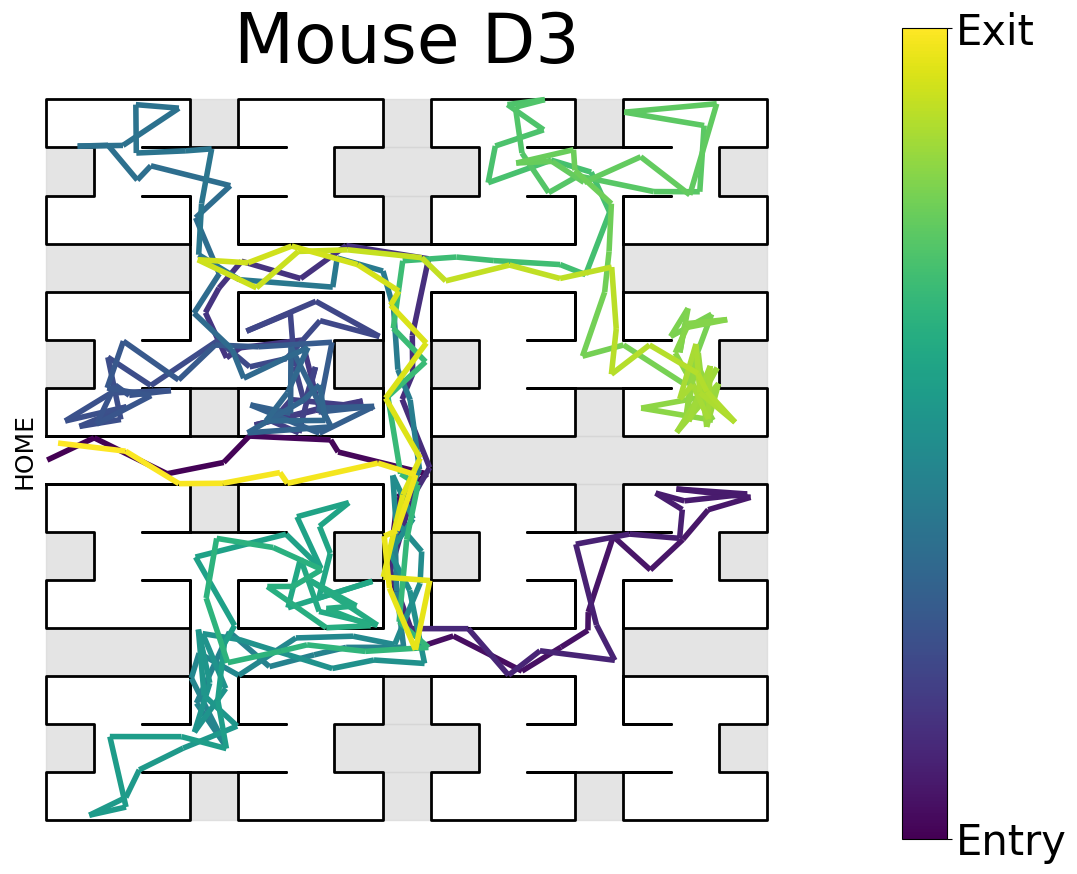

In [125]:
mouse = 'D3'
tf = LoadTrajFromPath(f'../outdata/{mouse}-tf')
i=226
traj = tf.no[i][:, 0]
print(len(traj))
plt_trajectory([traj], 'all', save_file_name=f'{figpath}/mouse{mouse}_{i}.pdf', title=f'Mouse {mouse}', entry_exit_colorbar=True)

201
168


/var/folders/yx/80nc9b6n4pg69y4hhtmkpw100000gp/T/ipykernel_69760/2401505023.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


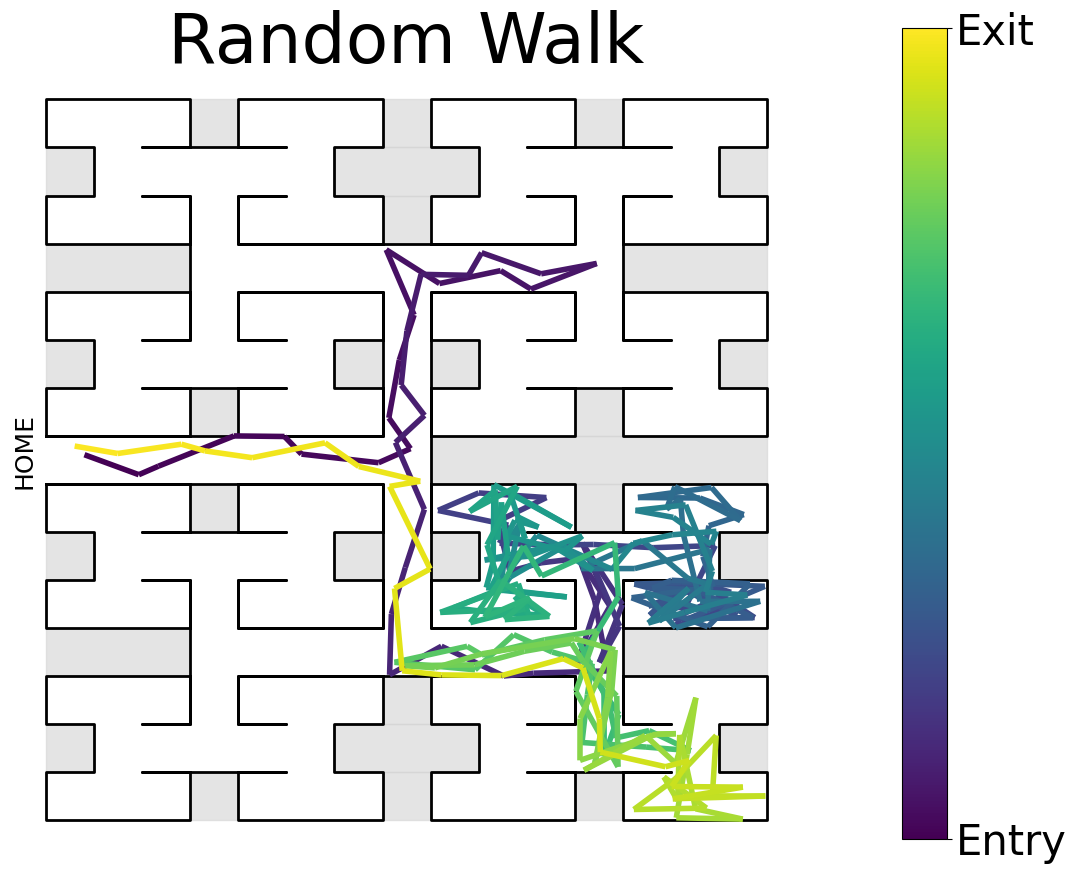

In [220]:
random_tf=LoadTrajFromPath('../outdata/rw01-tf')

# lens = np.array([len(_) for _ in random_tf.no])
# i = np.random.choice(np.where((lens < 180) & (lens > 150))[0])
i=201
print(i)
traj = random_tf.no[i][:, 0]
print(len(traj))
plt_trajectory([traj], 'all', display=False, title=f'Random Walk', save_file_name=f'{figpath}/randomwalktraj.pdf', entry_exit_colorbar=True)